# Importações e Agrupamentos para cálculos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

In [3]:
df = pd.read_csv('Global Solution.csv')

In [4]:
df

,ano,semana,regiao,hidraulica,termica,eolica,solar,total
0,2020,1,sul,"4662,33",1870,"595,02",0,"7127,35"
1,2020,1,sudeste e centro-oeste,"28134,31","6882,66",0,"23,67","35040,64"
2,2020,1,norte,"6699,23","2855,87","74,27",0,"9629,38"
3,2020,1,nordeste,"2902,47","2241,63","1910,45","38,94","7093,5"
4,2020,2,sul,"5704,31","1532,71","499,14",0,"7736,17"
...,...,...,...,...,...,...,...,...
999,2024,42,nordeste,"3018,84","437,42","14797,3","3636,01","21889,57"
1000,2024,43,sul,"10123,7","1470,52","916,86","1175,21","13686,29"
1001,2024,43,sudeste e centro-oeste,"20806,18","7599,32","9,87","3788,71","32204,08"
1002,2024,43,norte,"3689,59","2073,05","341,36","526,65","6630,65"


In [5]:
print(df.groupby('regiao')['hidraulica'].count())

regiao
nordeste                  251
norte                     251
sudeste e centro-oeste    251
sul                       251
Name: hidraulica, dtype: int64


In [6]:
# Transformando tudo em numerico para nao ter erro :)
df['hidraulica'] = pd.to_numeric(df['hidraulica'].str.replace(',', '.'), errors='coerce')
df['termica'] = pd.to_numeric(df['termica'].str.replace(',', '.'), errors='coerce')
df['eolica'] = pd.to_numeric(df['eolica'].str.replace(',', '.'), errors='coerce')
df['solar'] = pd.to_numeric(df['solar'].str.replace(',', '.'), errors='coerce')
df['total'] = pd.to_numeric(df['total'].str.replace(',', '.'), errors='coerce')

# Calculando Medidas Centrais e Medidas de Dispersão

In [8]:
def amplitude(x):
    return (x.max() - x.min())

def coeficiente_variacao(x):
    return 100*(x.std() / x.mean())

def desvio_medio(x):
  return abs(x-x.mean()).mean()

def q1(x):
  return x.quantile(0.25)

def q3(x):
  return x.quantile(0.75)

def moda(x):
    return x.mode()[0] if not x.mode().empty else float('nan') #Handle cases with no mode


result = df.aggregate({
    'hidraulica': ['mean','median', moda, 'std','min','max', amplitude, coeficiente_variacao,desvio_medio, q1, q3],
    'termica': ['mean','median', moda, 'std','min','max', amplitude, coeficiente_variacao,desvio_medio, q1, q3],
    'eolica': ['mean','median', moda, 'std','min','max', amplitude, coeficiente_variacao,desvio_medio, q1, q3],
    'solar': ['mean','median', moda, 'std','min','max', amplitude, coeficiente_variacao,desvio_medio, q1, q3],
    'total': ['mean','median', moda, 'std','min','max', amplitude, coeficiente_variacao,desvio_medio, q1, q3]
})

print(result,'\n')
print('\n Resultados após arredondamento (só para exposição) \n')
result.round(0).transpose()

                        hidraulica       termica        eolica        solar  \
mean                  10334.630697   2671.870050   2301.314034   515.417231   
median                 7339.495000   1609.960000    362.895000    48.565000   
moda                   3897.330000     92.490000      0.000000     0.000000   
std                    7489.686436   2519.273730   3859.066458  1074.843305   
min                     462.120000     92.490000      0.000000     0.000000   
max                   30358.390000  11807.490000  16038.500000  5211.730000   
amplitude             29896.270000  11715.000000  16038.500000  5211.730000   
coeficiente_variacao     72.471738     94.288782    167.689694   208.538489   
desvio_medio           6397.630454   1975.372835   3009.740314   720.603263   
q1                     3794.555000    907.802500     18.170000     0.160000   
q3                    15583.390000   3924.687500   1170.122500   296.967500   

                             total  
mean          

,mean,median,moda,std,min,max,amplitude,coeficiente_variacao,desvio_medio,q1,q3
hidraulica,10335.0,7339.0,3897.0,7490.0,462.0,30358.0,29896.0,72.0,6398.0,3795.0,15583.0
termica,2672.0,1610.0,92.0,2519.0,92.0,11807.0,11715.0,94.0,1975.0,908.0,3925.0
eolica,2301.0,363.0,0.0,3859.0,0.0,16038.0,16038.0,168.0,3010.0,18.0,1170.0
solar,515.0,49.0,0.0,1075.0,0.0,5212.0,5212.0,209.0,721.0,0.0,297.0
total,15823.0,13776.0,2364.0,8590.0,2364.0,38386.0,36022.0,54.0,7019.0,8745.0,22268.0


# Alguns boxplots e gráficos iniciais

Comparacao de Hidraulica por Regiao


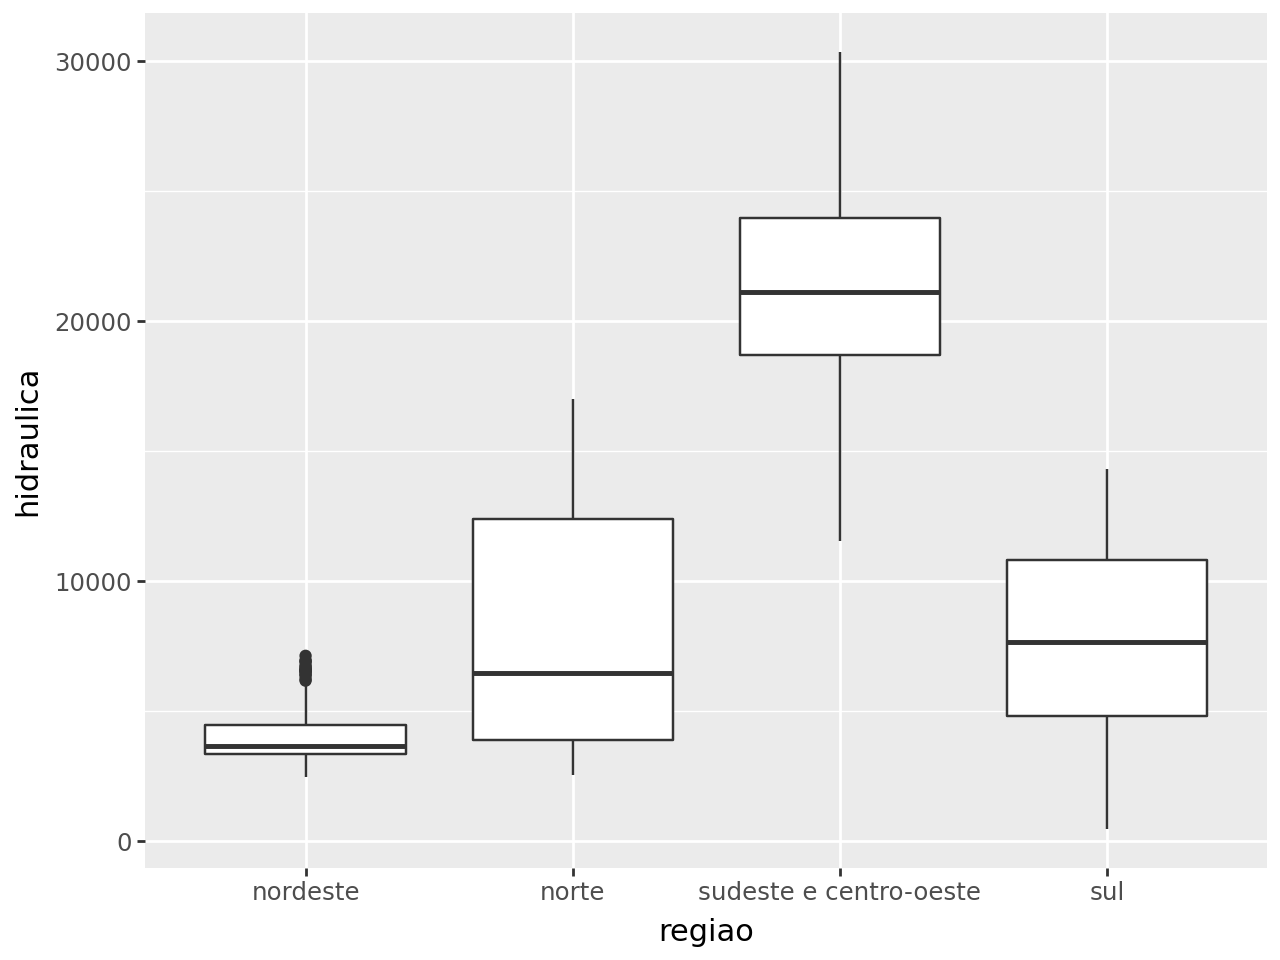

In [9]:
print('Comparacao de Hidraulica por Regiao')
(ggplot(df,aes(x='regiao',y='hidraulica'))+
 geom_boxplot()
)

Comparacao de Termica por Regiao


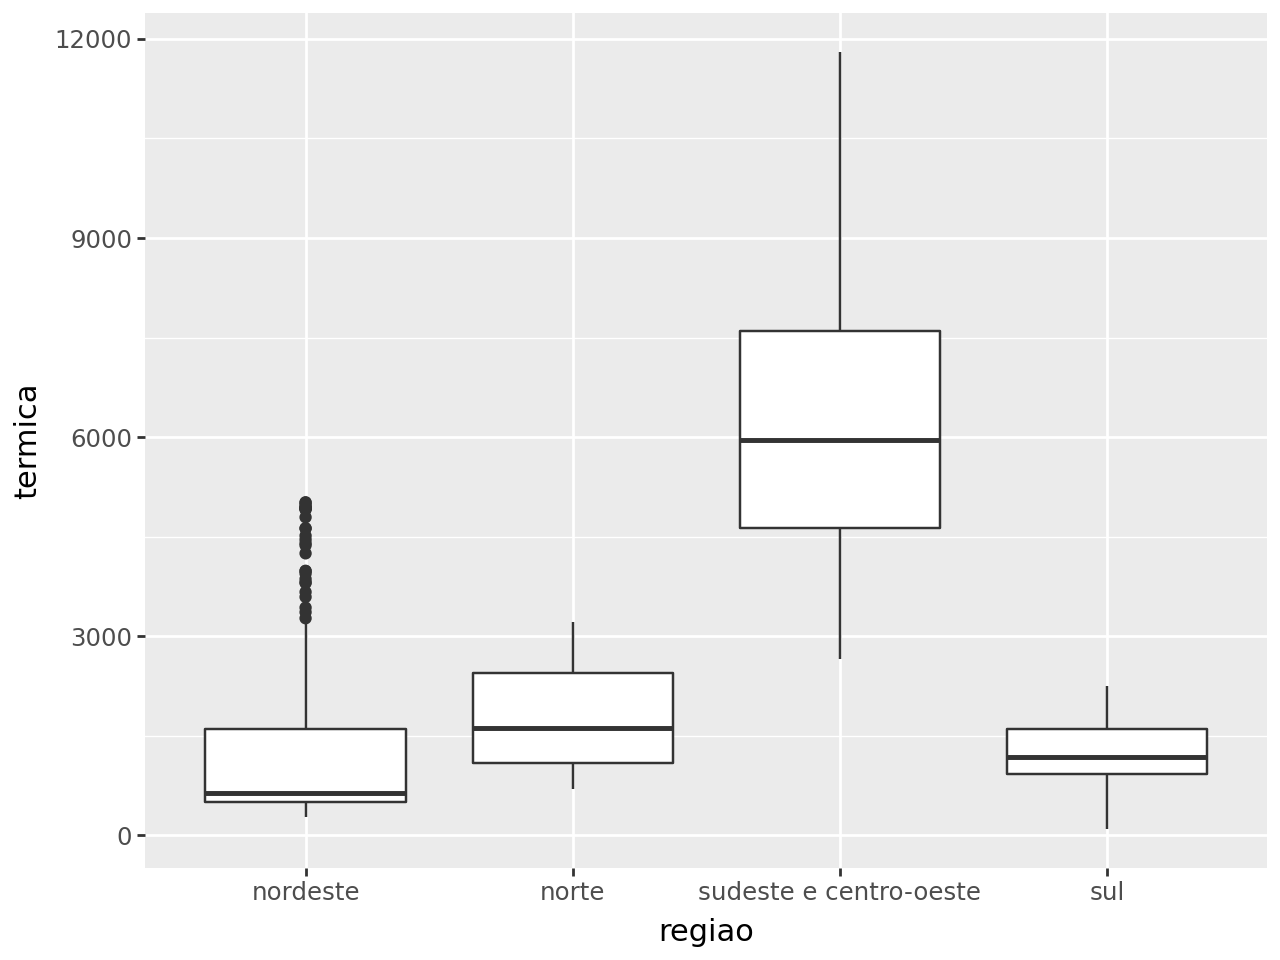

In [10]:
print('Comparacao de Termica por Regiao')
(ggplot(df,aes(x='regiao',y='termica'))+
 geom_boxplot()
)

Comparacao de Eolica por Regiao


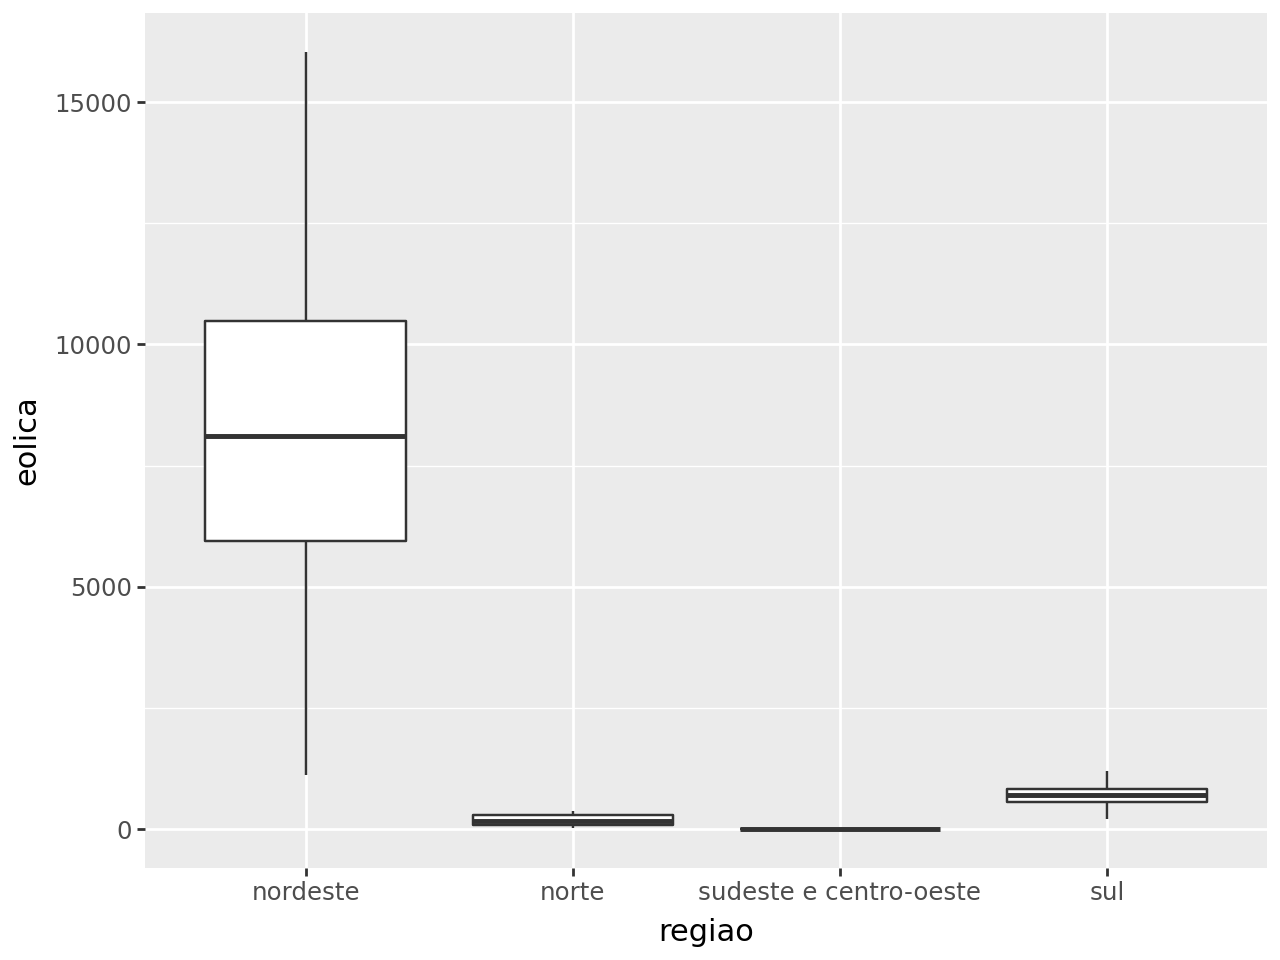

In [11]:
print('Comparacao de Eolica por Regiao')
(ggplot(df,aes(x='regiao',y='eolica'))+
 geom_boxplot()
)

Comparacao de Solar por Regiao


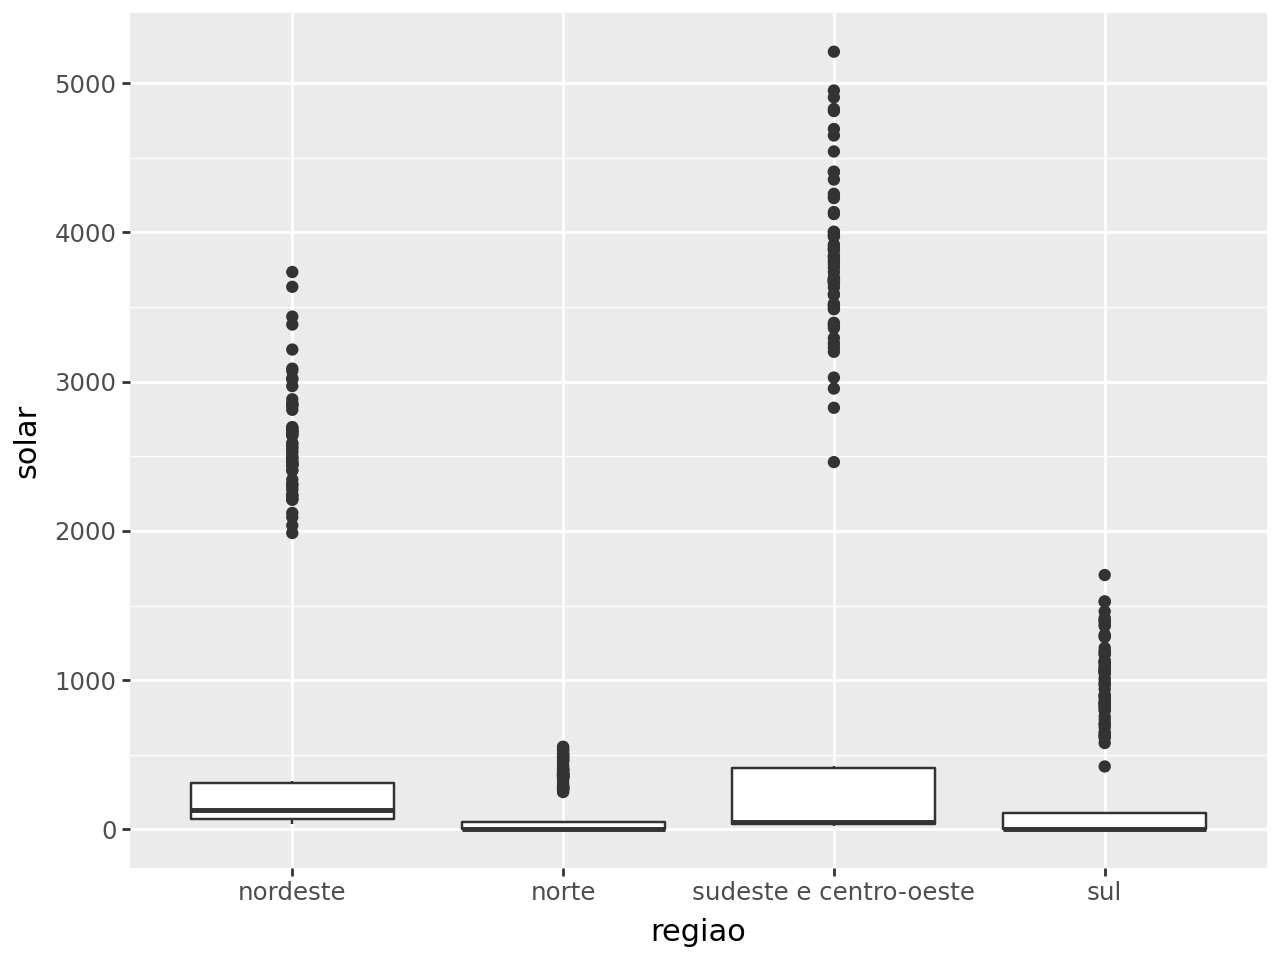

In [12]:
print('Comparacao de Solar por Regiao')
(ggplot(df,aes(x='regiao',y='solar'))+
 geom_boxplot()
)

Comparacao do Total por Regiao


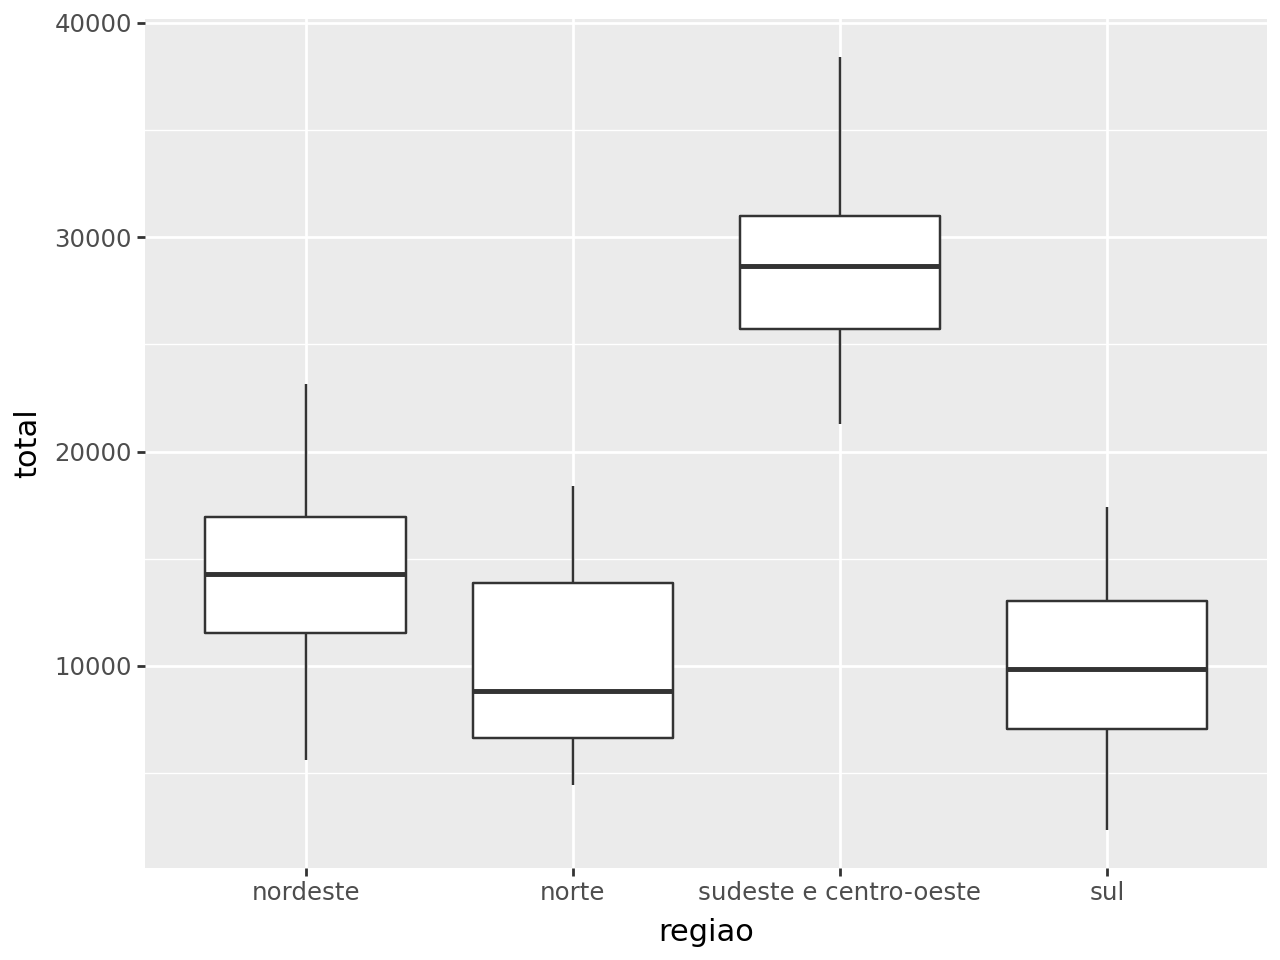

In [13]:
print('Comparacao do Total por Regiao')
(ggplot(df,aes(x='regiao',y='total'))+
 geom_boxplot()
)

/usr/local/lib/python3.11/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 13'. Pick better value with 'binwidth'.


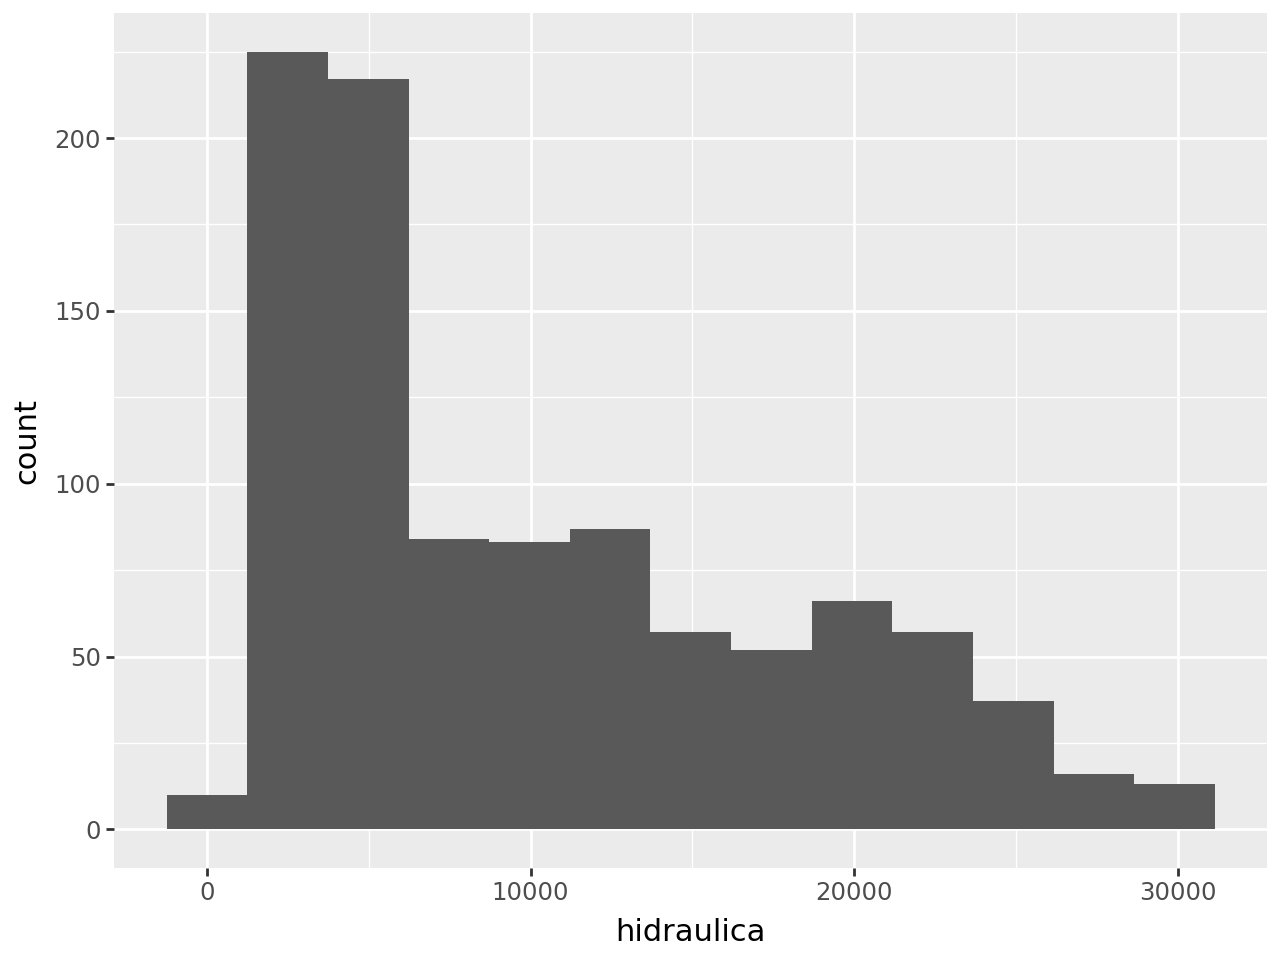

In [14]:
ggplot(df,aes(x='hidraulica'))+geom_histogram()

/usr/local/lib/python3.11/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 20'. Pick better value with 'binwidth'.


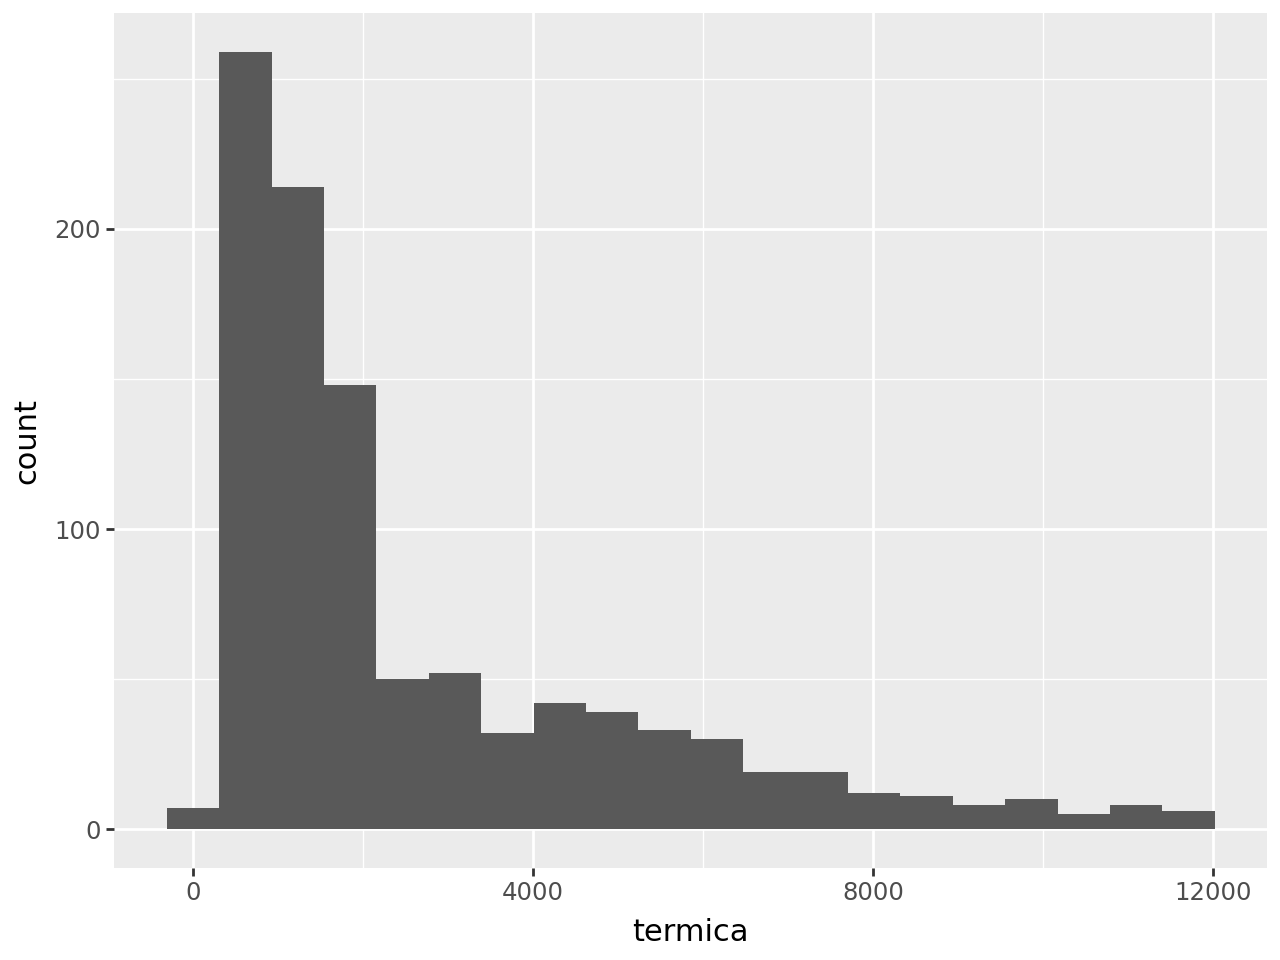

In [15]:
ggplot(df,aes(x='termica'))+geom_histogram()

/usr/local/lib/python3.11/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 70'. Pick better value with 'binwidth'.


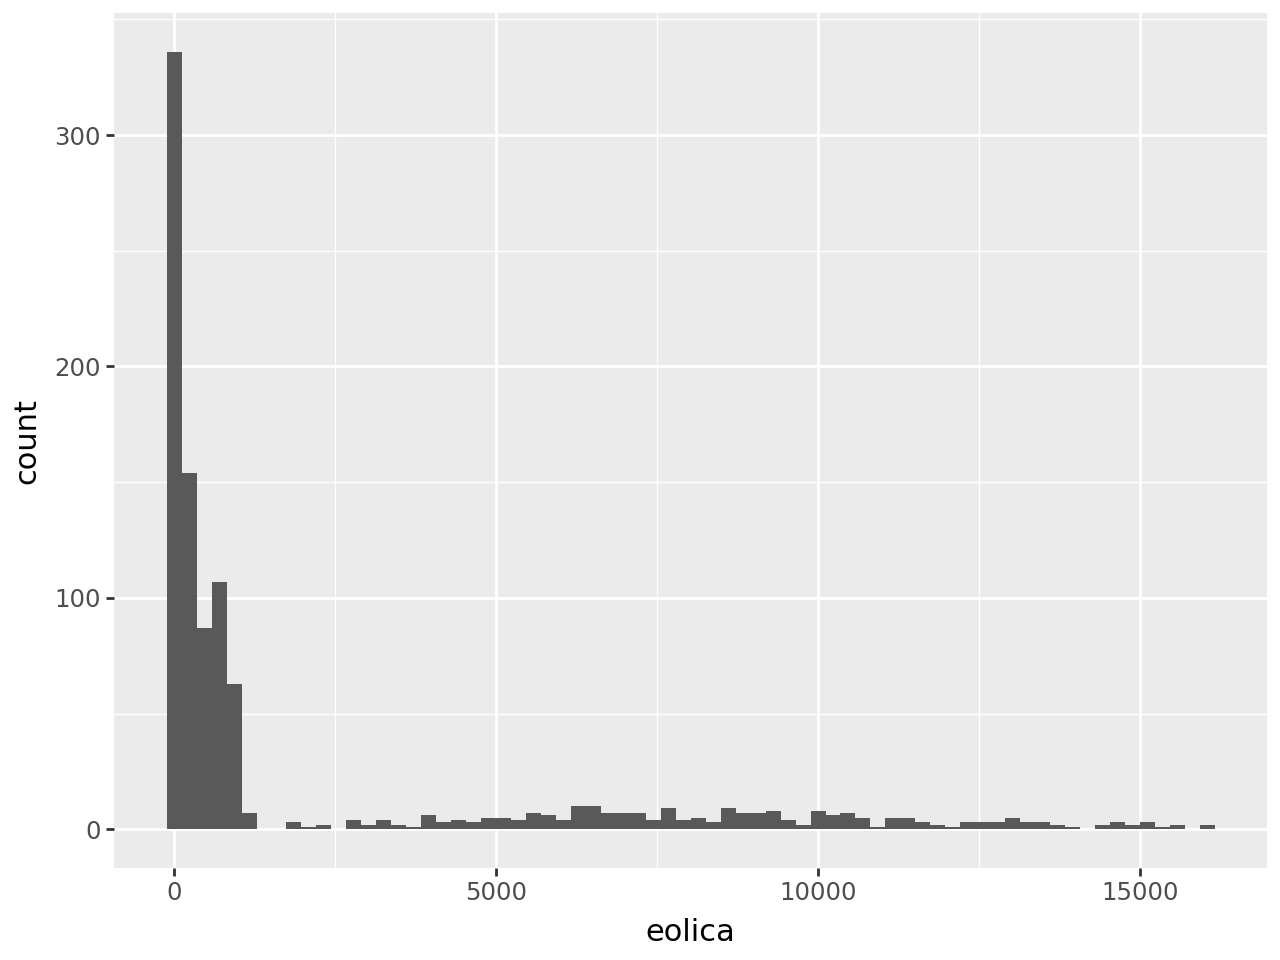

In [16]:
ggplot(df,aes(x='eolica'))+geom_histogram()

/usr/local/lib/python3.11/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 88'. Pick better value with 'binwidth'.


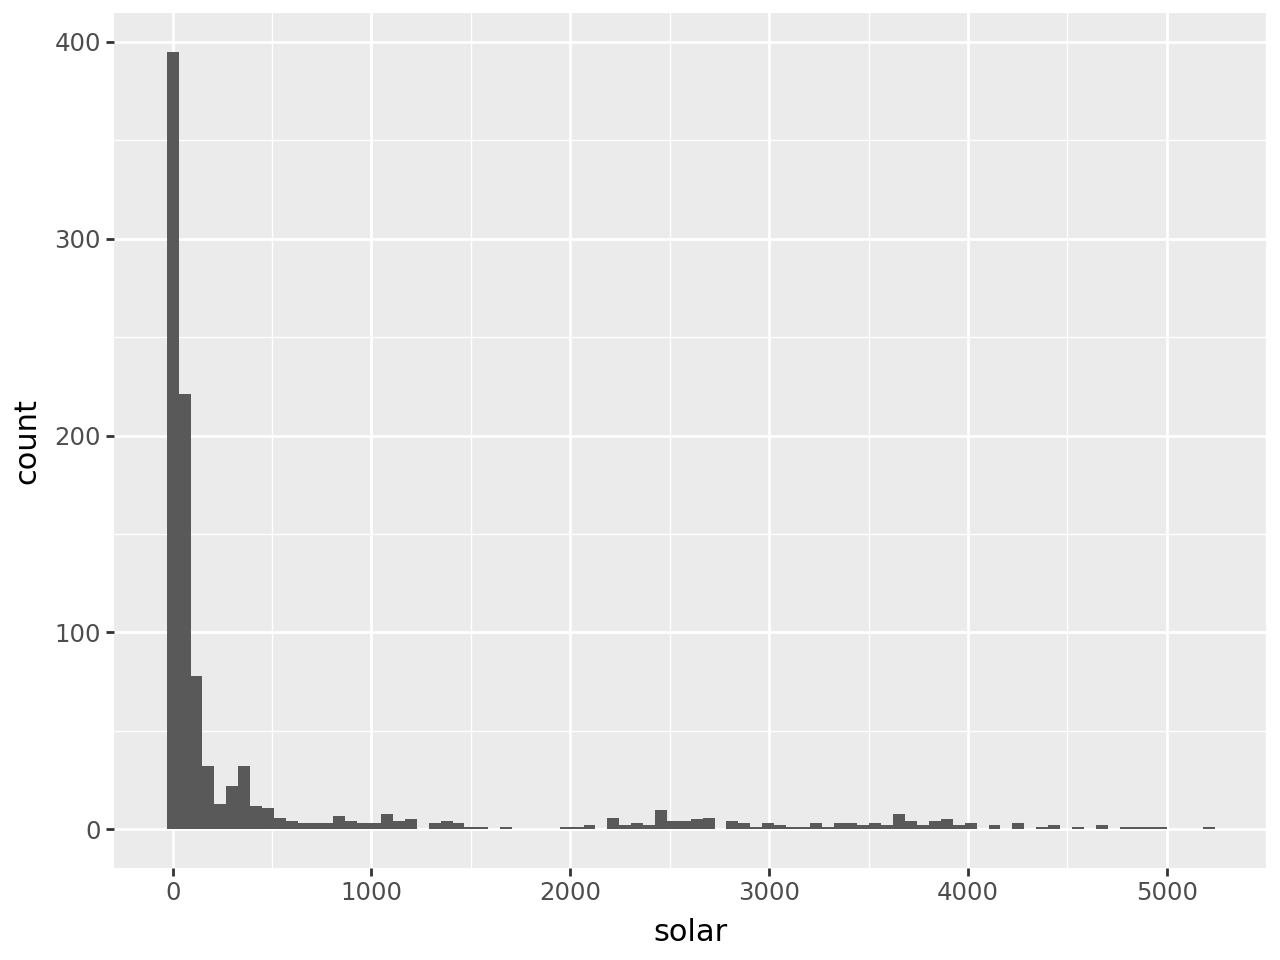

In [17]:
ggplot(df,aes(x='solar'))+geom_histogram()

# Criando dfs específicos para cada região

In [19]:
# Filtrando o dataset para um conjunto só com a região sul

df['ano'] = pd.to_numeric(df['ano'], errors='coerce')
df['semana'] = pd.to_numeric(df['semana'], errors='coerce')

df_sorted = df.sort_values(by=['ano', 'semana'])

df_sul = df_sorted[df_sorted['regiao'] == 'sul']

print(df_sul.head())


     ano  semana regiao  hidraulica  termica  eolica  solar    total
0   2020       1    sul     4662.33  1870.00  595.02    0.0  7127.35
4   2020       2    sul     5704.31  1532.71  499.14    0.0  7736.17
8   2020       3    sul     4083.58  1826.07  519.13    0.0  6428.78
12  2020       4    sul     4201.27  1978.18  215.57    0.0  6395.02
16  2020       5    sul     3846.21  1174.98  924.89    0.0  5946.07


In [20]:
# Filtrando o dataset para um conjunto só com a região sudeste e centro-oeste

df['ano'] = pd.to_numeric(df['ano'], errors='coerce')
df['semana'] = pd.to_numeric(df['semana'], errors='coerce')

df_sorted = df.sort_values(by=['ano', 'semana'])

df_sudeste_oeste = df_sorted[df_sorted['regiao'] == 'sudeste e centro-oeste']

print(df_sudeste_oeste.head())


     ano  semana                  regiao  hidraulica  termica  eolica  solar  \
1   2020       1  sudeste e centro-oeste    28134.31  6882.66     0.0  23.67   
5   2020       2  sudeste e centro-oeste    27591.48  5053.82     0.0  31.95   
9   2020       3  sudeste e centro-oeste    25160.24  5334.80     0.0  22.17   
13  2020       4  sudeste e centro-oeste    26997.08  5963.31     0.0  24.93   
17  2020       5  sudeste e centro-oeste    29549.04  4323.43     0.0  22.36   

       total  
1   35040.64  
5   32677.24  
9   30517.21  
13  32985.32  
17  33894.82  


In [21]:
# Filtrando o dataset para um conjunto só com a região norte

df['ano'] = pd.to_numeric(df['ano'], errors='coerce')
df['semana'] = pd.to_numeric(df['semana'], errors='coerce')

df_sorted = df.sort_values(by=['ano', 'semana'])

df_norte = df_sorted[df_sorted['regiao'] == 'norte']

print(df_norte.head())

     ano  semana regiao  hidraulica  termica  eolica  solar     total
2   2020       1  norte     6699.23  2855.87   74.27    0.0   9629.38
6   2020       2  norte     8687.49  2845.17  147.69    0.0  11680.35
10  2020       3  norte     8973.54  2838.68  132.08    0.0  11944.29
14  2020       4  norte     9685.80  2885.01  147.41    0.0  12718.22
18  2020       5  norte    11193.64  2593.74   91.04    0.0  13878.42


In [22]:
# Filtrando o dataset para um conjunto só com a região nordeste

df['ano'] = pd.to_numeric(df['ano'], errors='coerce')
df['semana'] = pd.to_numeric(df['semana'], errors='coerce')

df_sorted = df.sort_values(by=['ano', 'semana'])

df_nordeste = df_sorted[df_sorted['regiao'] == 'nordeste']

print(df_nordeste.head())

     ano  semana    regiao  hidraulica  termica   eolica  solar    total
3   2020       1  nordeste     2902.47  2241.63  1910.45  38.94  7093.50
7   2020       2  nordeste     2752.70  2222.96  3934.13  59.97  8969.77
11  2020       3  nordeste     2925.72  2410.15  3061.32  37.63  8434.82
15  2020       4  nordeste     3164.09  2446.96  3229.08  48.33  8888.46
19  2020       5  nordeste     3074.75  2118.44  2030.71  41.95  7265.86


In [23]:
# criando indice no df_sul
df_sul['data'] = range(len(df_sul))

print(df_sul.head())

     ano  semana regiao  hidraulica  termica  eolica  solar    total  data
0   2020       1    sul     4662.33  1870.00  595.02    0.0  7127.35     0
4   2020       2    sul     5704.31  1532.71  499.14    0.0  7736.17     1
8   2020       3    sul     4083.58  1826.07  519.13    0.0  6428.78     2
12  2020       4    sul     4201.27  1978.18  215.57    0.0  6395.02     3
16  2020       5    sul     3846.21  1174.98  924.89    0.0  5946.07     4


In [24]:
# criando indice no df_sudeste_oeste
df_sudeste_oeste['data'] = range(len(df_sudeste_oeste))

print(df_sudeste_oeste.head())

     ano  semana                  regiao  hidraulica  termica  eolica  solar  \
1   2020       1  sudeste e centro-oeste    28134.31  6882.66     0.0  23.67   
5   2020       2  sudeste e centro-oeste    27591.48  5053.82     0.0  31.95   
9   2020       3  sudeste e centro-oeste    25160.24  5334.80     0.0  22.17   
13  2020       4  sudeste e centro-oeste    26997.08  5963.31     0.0  24.93   
17  2020       5  sudeste e centro-oeste    29549.04  4323.43     0.0  22.36   

       total  data  
1   35040.64     0  
5   32677.24     1  
9   30517.21     2  
13  32985.32     3  
17  33894.82     4  


In [25]:
# criando indice no df_norte
df_norte['data'] = range(len(df_norte))

print(df_norte.head())

     ano  semana regiao  hidraulica  termica  eolica  solar     total  data
2   2020       1  norte     6699.23  2855.87   74.27    0.0   9629.38     0
6   2020       2  norte     8687.49  2845.17  147.69    0.0  11680.35     1
10  2020       3  norte     8973.54  2838.68  132.08    0.0  11944.29     2
14  2020       4  norte     9685.80  2885.01  147.41    0.0  12718.22     3
18  2020       5  norte    11193.64  2593.74   91.04    0.0  13878.42     4


In [26]:
# criando indice no df_nordeste
df_nordeste['data'] = range(len(df_nordeste))

print(df_nordeste.head())

     ano  semana    regiao  hidraulica  termica   eolica  solar    total  data
3   2020       1  nordeste     2902.47  2241.63  1910.45  38.94  7093.50     0
7   2020       2  nordeste     2752.70  2222.96  3934.13  59.97  8969.77     1
11  2020       3  nordeste     2925.72  2410.15  3061.32  37.63  8434.82     2
15  2020       4  nordeste     3164.09  2446.96  3229.08  48.33  8888.46     3
19  2020       5  nordeste     3074.75  2118.44  2030.71  41.95  7265.86     4


<ipython-input-26-6c38b9703ebc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Criando um gráfico temporal ao longo de data considerando as fontes de energia como frações do total

## Região Sul

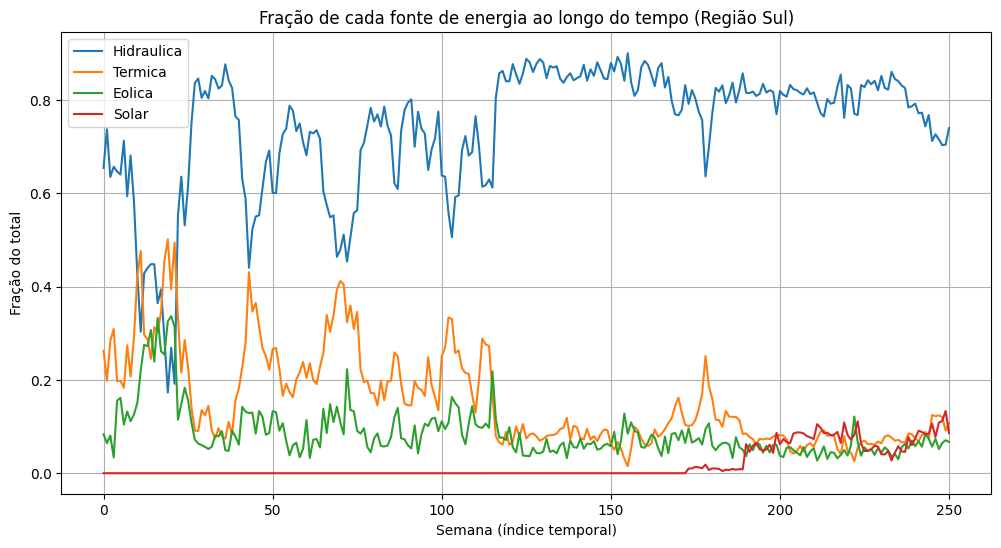

In [27]:
# Criando fracoes
df_sul['frac_hidraulica'] = df_sul['hidraulica'] / df_sul['total']
df_sul['frac_termica'] = df_sul['termica'] / df_sul['total']
df_sul['frac_eolica'] = df_sul['eolica'] / df_sul['total']
df_sul['frac_solar'] = df_sul['solar'] / df_sul['total']

# Criando tempo
plt.figure(figsize=(12, 6))
plt.plot(df_sul['data'], df_sul['frac_hidraulica'], label='Hidraulica')
plt.plot(df_sul['data'], df_sul['frac_termica'], label='Termica')
plt.plot(df_sul['data'], df_sul['frac_eolica'], label='Eolica')
plt.plot(df_sul['data'], df_sul['frac_solar'], label='Solar')

plt.xlabel('Semana (índice temporal)')
plt.ylabel('Fração do total')
plt.title('Fração de cada fonte de energia ao longo do tempo (Região Sul)')
plt.legend()
plt.grid(True)
plt.show()

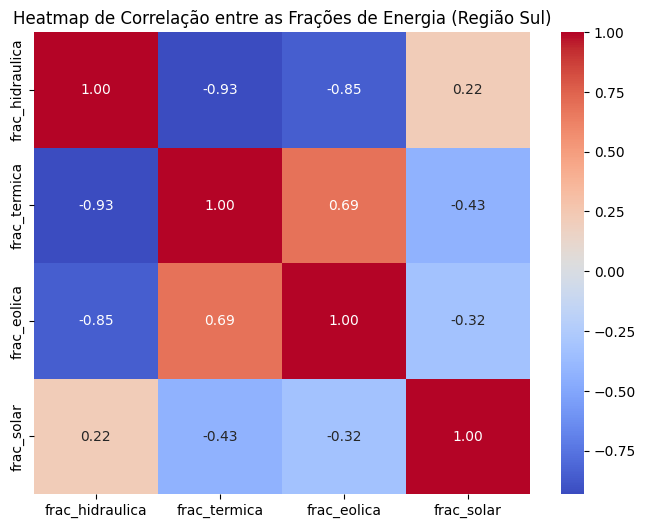

In [28]:
# Fazendo o heatmap de correlação entre as frações calculadas

fraction_columns = ['frac_hidraulica', 'frac_termica', 'frac_eolica', 'frac_solar']
correlation_matrix = df_sul[fraction_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlação entre as Frações de Energia (Região Sul)')
plt.show()

## Regiões Sudeste e Centro-Oeste

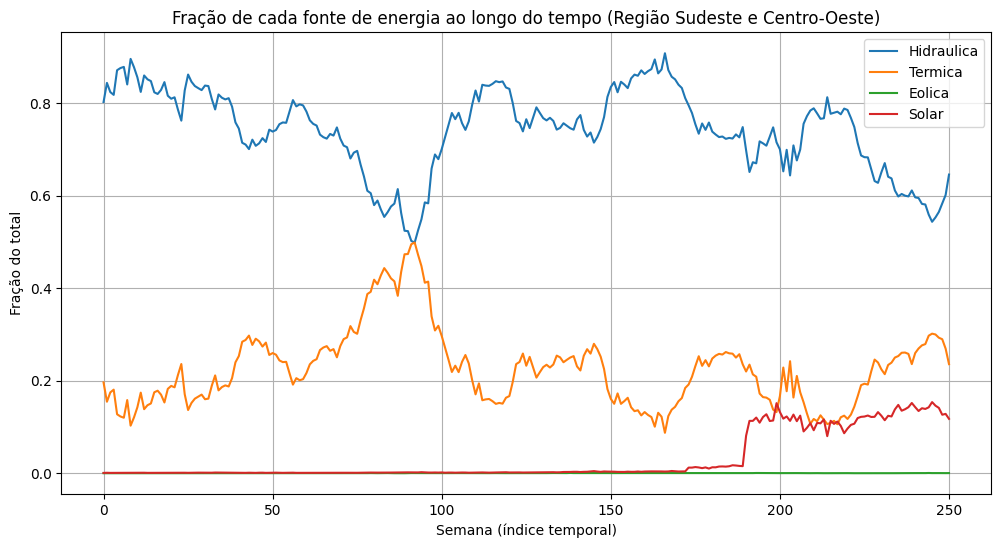

In [30]:
df_sudeste_oeste['frac_hidraulica'] = df_sudeste_oeste['hidraulica'] / df_sudeste_oeste['total']
df_sudeste_oeste['frac_termica'] = df_sudeste_oeste['termica'] / df_sudeste_oeste['total']
df_sudeste_oeste['frac_eolica'] = df_sudeste_oeste['eolica'] / df_sudeste_oeste['total']
df_sudeste_oeste['frac_solar'] = df_sudeste_oeste['solar'] / df_sudeste_oeste['total']

plt.figure(figsize=(12, 6))
plt.plot(df_sudeste_oeste['data'], df_sudeste_oeste['frac_hidraulica'], label='Hidraulica')
plt.plot(df_sudeste_oeste['data'], df_sudeste_oeste['frac_termica'], label='Termica')
plt.plot(df_sudeste_oeste['data'], df_sudeste_oeste['frac_eolica'], label='Eolica')
plt.plot(df_sudeste_oeste['data'], df_sudeste_oeste['frac_solar'], label='Solar')

plt.xlabel('Semana (índice temporal)')
plt.ylabel('Fração do total')
plt.title('Fração de cada fonte de energia ao longo do tempo (Região Sudeste e Centro-Oeste)')
plt.legend()
plt.grid(True)
plt.show()

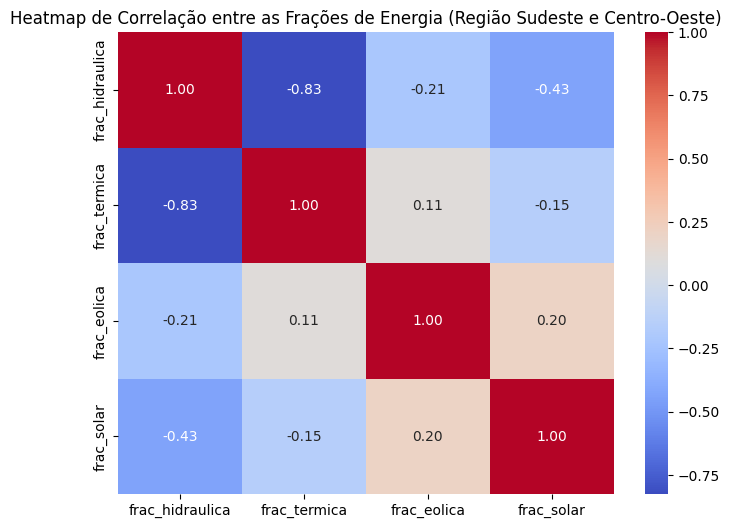

In [31]:
fraction_columns = ['frac_hidraulica', 'frac_termica', 'frac_eolica', 'frac_solar']
correlation_matrix = df_sudeste_oeste[fraction_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlação entre as Frações de Energia (Região Sudeste e Centro-Oeste)')
plt.show()

## Região Norte

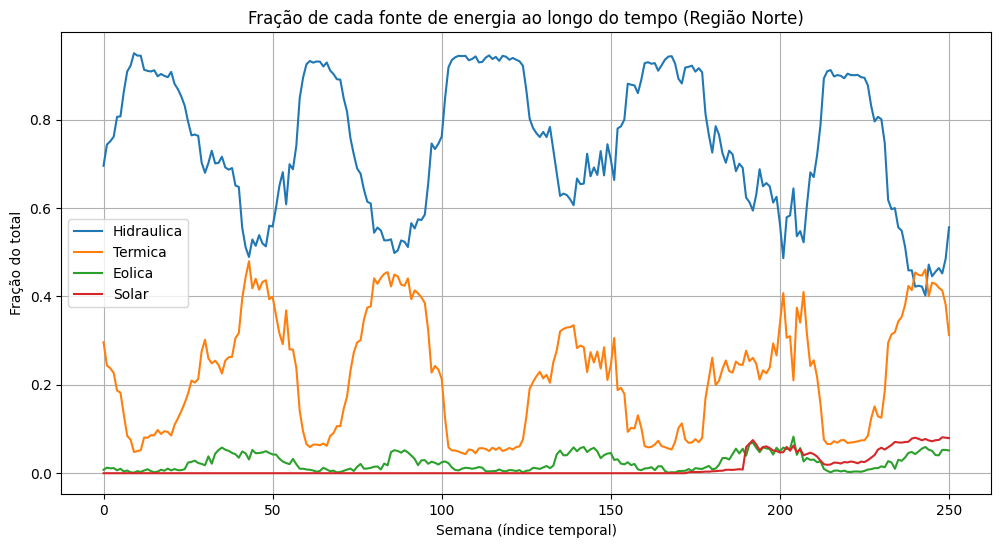

In [33]:
df_norte['frac_hidraulica'] = df_norte['hidraulica'] / df_norte['total']
df_norte['frac_termica'] = df_norte['termica'] / df_norte['total']
df_norte['frac_eolica'] = df_norte['eolica'] / df_norte['total']
df_norte['frac_solar'] = df_norte['solar'] / df_norte['total']

plt.figure(figsize=(12, 6))
plt.plot(df_norte['data'], df_norte['frac_hidraulica'], label='Hidraulica')
plt.plot(df_norte['data'], df_norte['frac_termica'], label='Termica')
plt.plot(df_norte['data'], df_norte['frac_eolica'], label='Eolica')
plt.plot(df_norte['data'], df_norte['frac_solar'], label='Solar')

plt.xlabel('Semana (índice temporal)')
plt.ylabel('Fração do total')
plt.title('Fração de cada fonte de energia ao longo do tempo (Região Norte)')
plt.legend()
plt.grid(True)
plt.show()

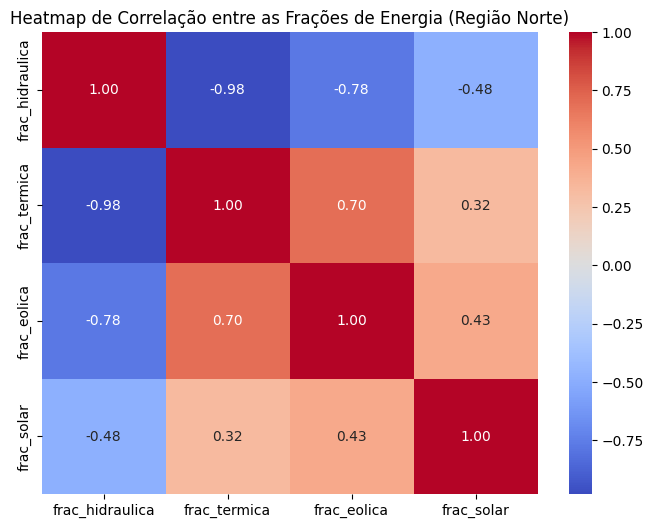

In [35]:
fraction_columns = ['frac_hidraulica', 'frac_termica', 'frac_eolica', 'frac_solar']
correlation_matrix = df_norte[fraction_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlação entre as Frações de Energia (Região Norte)')
plt.show()

## Região Nordeste

<ipython-input-36-3e214f9a04e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-36-3e214f9a04e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-36-3e214f9a04e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-36-3e214f9a04e1>

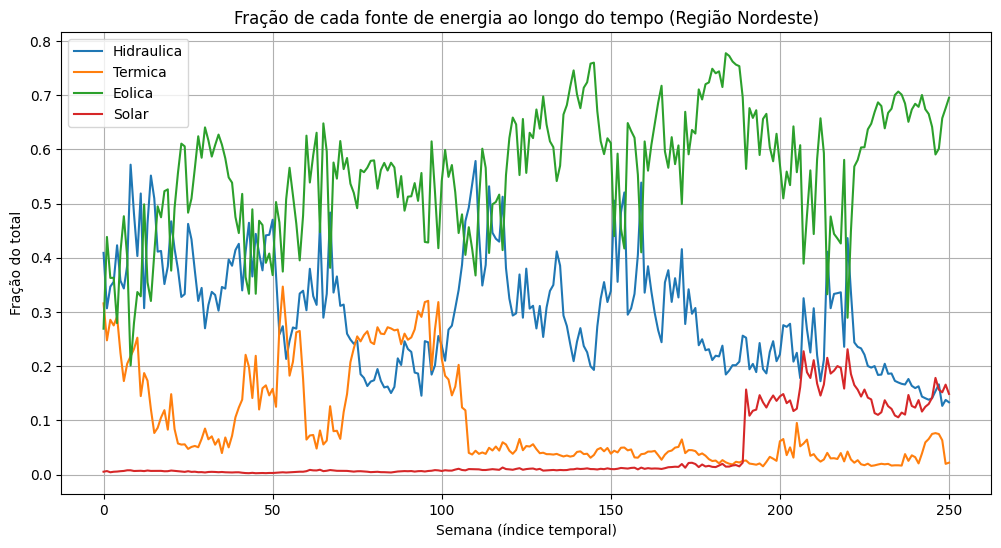

In [36]:
df_nordeste['frac_hidraulica'] = df_nordeste['hidraulica'] / df_nordeste['total']
df_nordeste['frac_termica'] = df_nordeste['termica'] / df_nordeste['total']
df_nordeste['frac_eolica'] = df_nordeste['eolica'] / df_nordeste['total']
df_nordeste['frac_solar'] = df_nordeste['solar'] / df_nordeste['total']

plt.figure(figsize=(12, 6))
plt.plot(df_nordeste['data'], df_nordeste['frac_hidraulica'], label='Hidraulica')
plt.plot(df_nordeste['data'], df_nordeste['frac_termica'], label='Termica')
plt.plot(df_nordeste['data'], df_nordeste['frac_eolica'], label='Eolica')
plt.plot(df_nordeste['data'], df_nordeste['frac_solar'], label='Solar')

plt.xlabel('Semana (índice temporal)')
plt.ylabel('Fração do total')
plt.title('Fração de cada fonte de energia ao longo do tempo (Região Nordeste)')
plt.legend()
plt.grid(True)
plt.show()

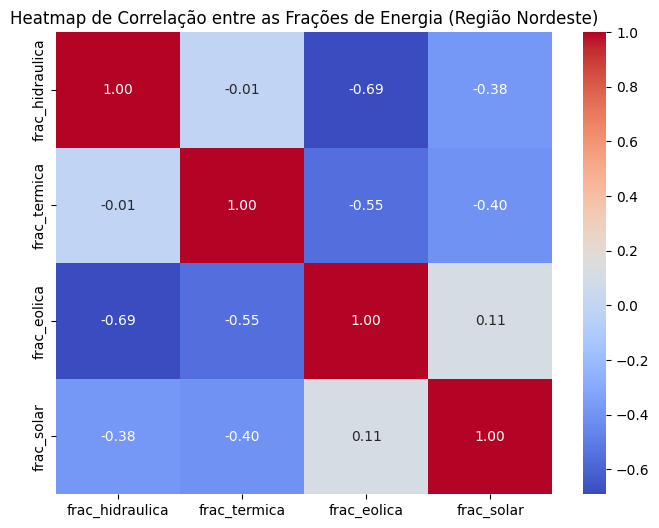

In [37]:
fraction_columns = ['frac_hidraulica', 'frac_termica', 'frac_eolica', 'frac_solar']
correlation_matrix = df_nordeste[fraction_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlação entre as Frações de Energia (Região Nordeste)')
plt.show()

# Gráficos que não deram muito certo mas gosto de deixar aqui pq sim

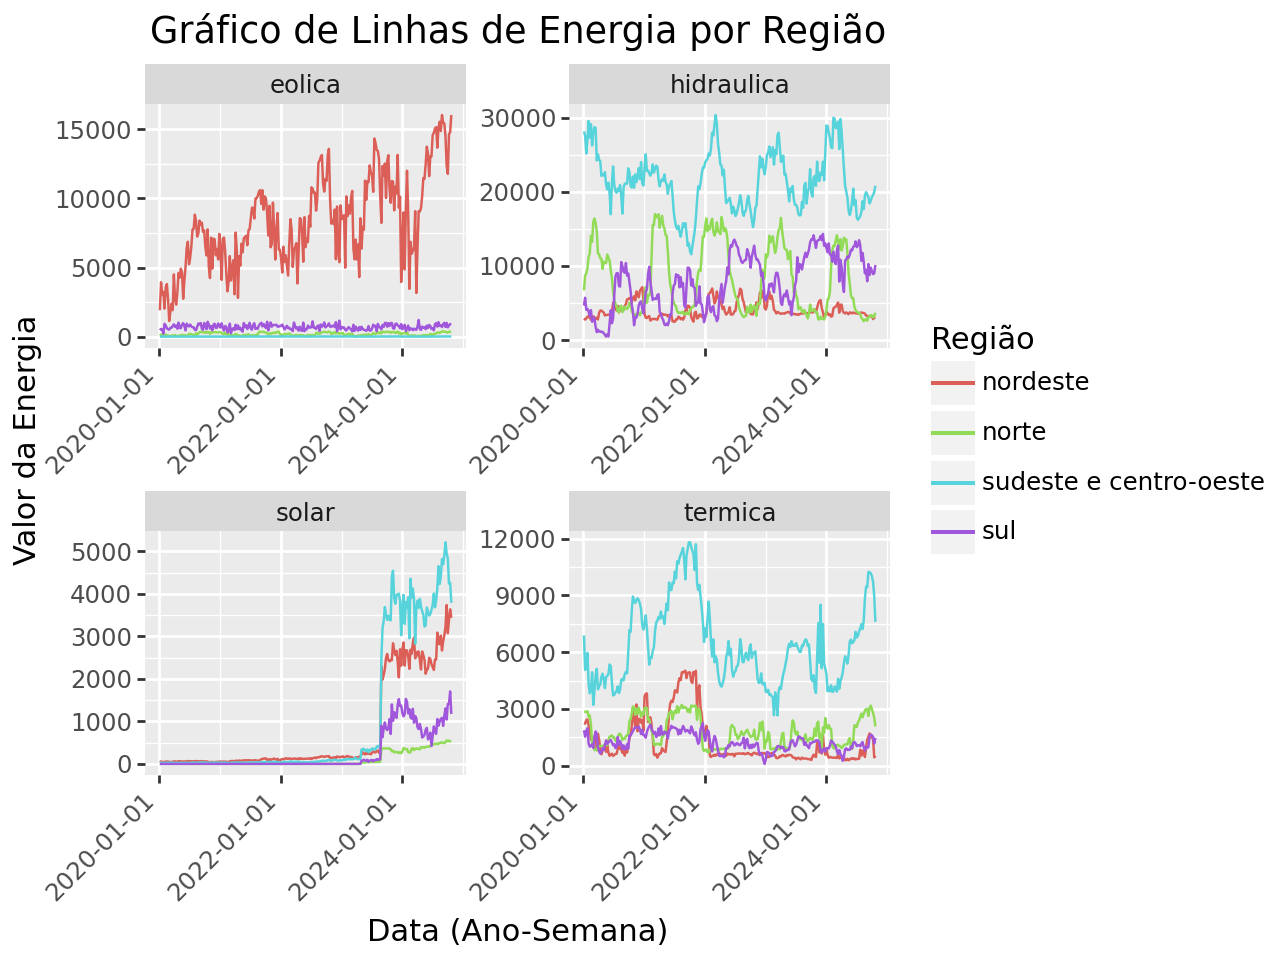

In [44]:
# Gerando gráfico temporal dividido por cada região e cada fonte de energia

df_long = pd.melt(df, id_vars=['regiao', 'ano', 'semana'],
                  value_vars=['hidraulica', 'termica', 'eolica', 'solar'],
                  var_name='energia', value_name='valor')

df_long['ano'] = pd.to_numeric(df_long['ano'], errors='coerce')
df_long['semana'] = pd.to_numeric(df_long['semana'], errors='coerce')

df_long['data'] = pd.to_datetime(df_long['ano'].astype(str) + '-' + df_long['semana'].astype(str) + '-1', format='%Y-%W-%w', errors='coerce')

df_long = df_long.sort_values('data')

(
    ggplot(df_long, aes(x='data', y='valor', color='regiao'))
    + geom_line()
    + facet_wrap('~energia',scales='free')
    + labs(title='Gráfico de Linhas de Energia por Região',
           x='Data (Ano-Semana)',
           y='Valor da Energia',
           color='Região')
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)

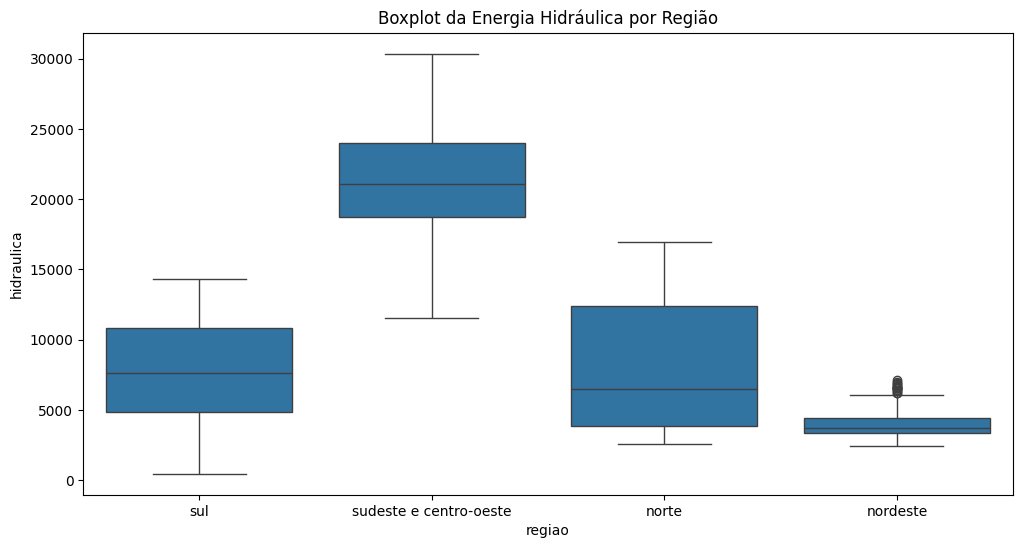

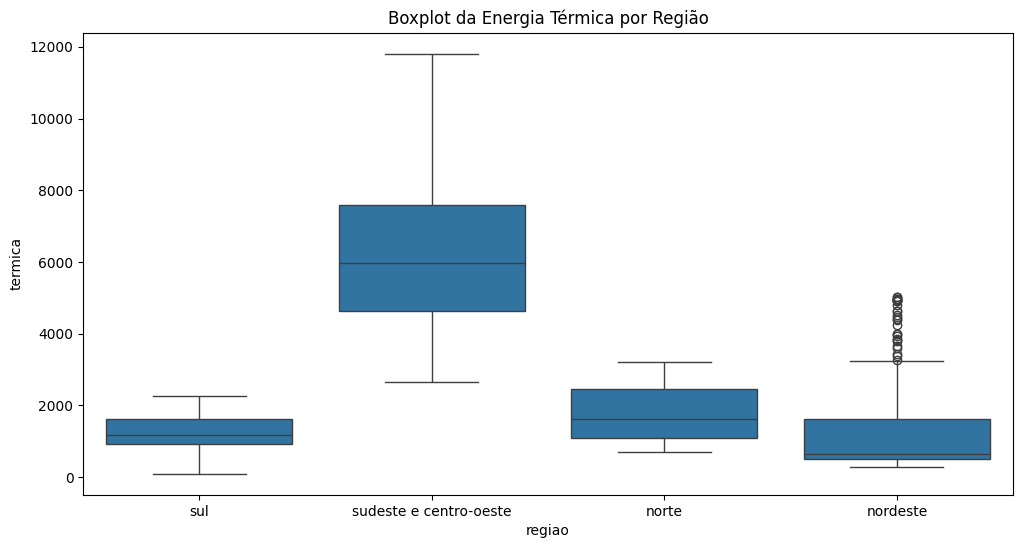

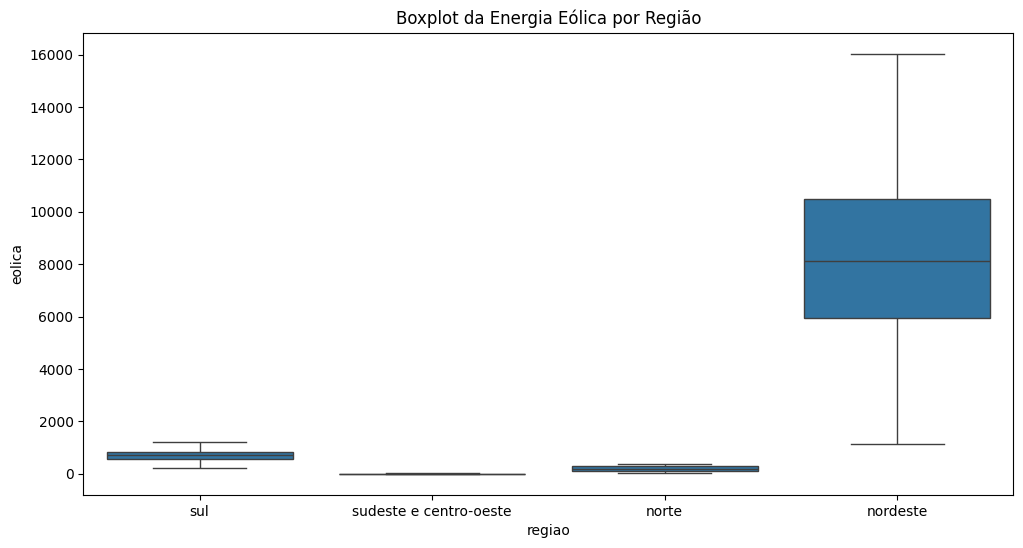

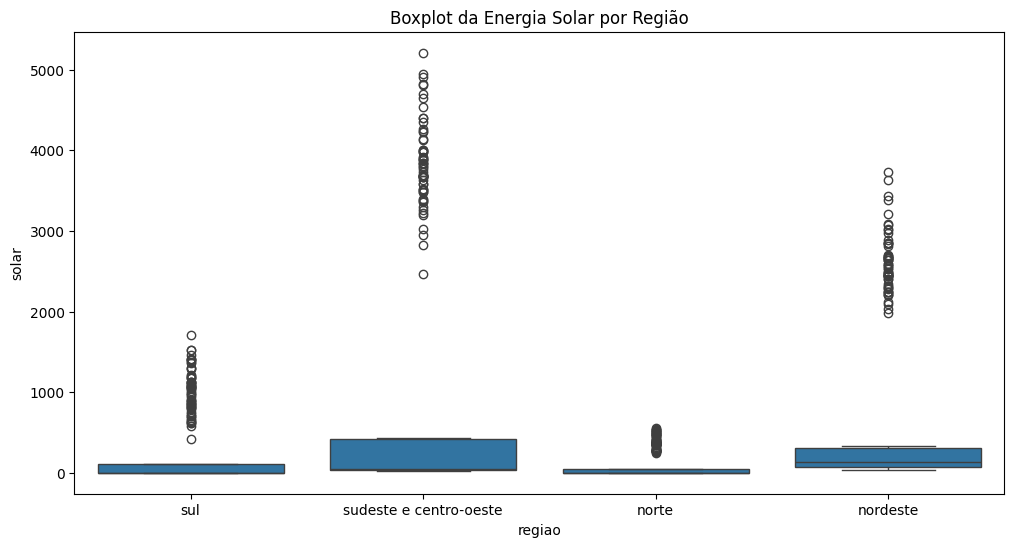

In [42]:
# Boxplot de cada fonte de energia por região
plt.figure(figsize=(12, 6))
sns.boxplot(x='regiao', y='hidraulica', data=df)
plt.title('Boxplot da Energia Hidráulica por Região')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='regiao', y='termica', data=df)
plt.title('Boxplot da Energia Térmica por Região')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='regiao', y='eolica', data=df)
plt.title('Boxplot da Energia Eólica por Região')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='regiao', y='solar', data=df)
plt.title('Boxplot da Energia Solar por Região')
plt.show()

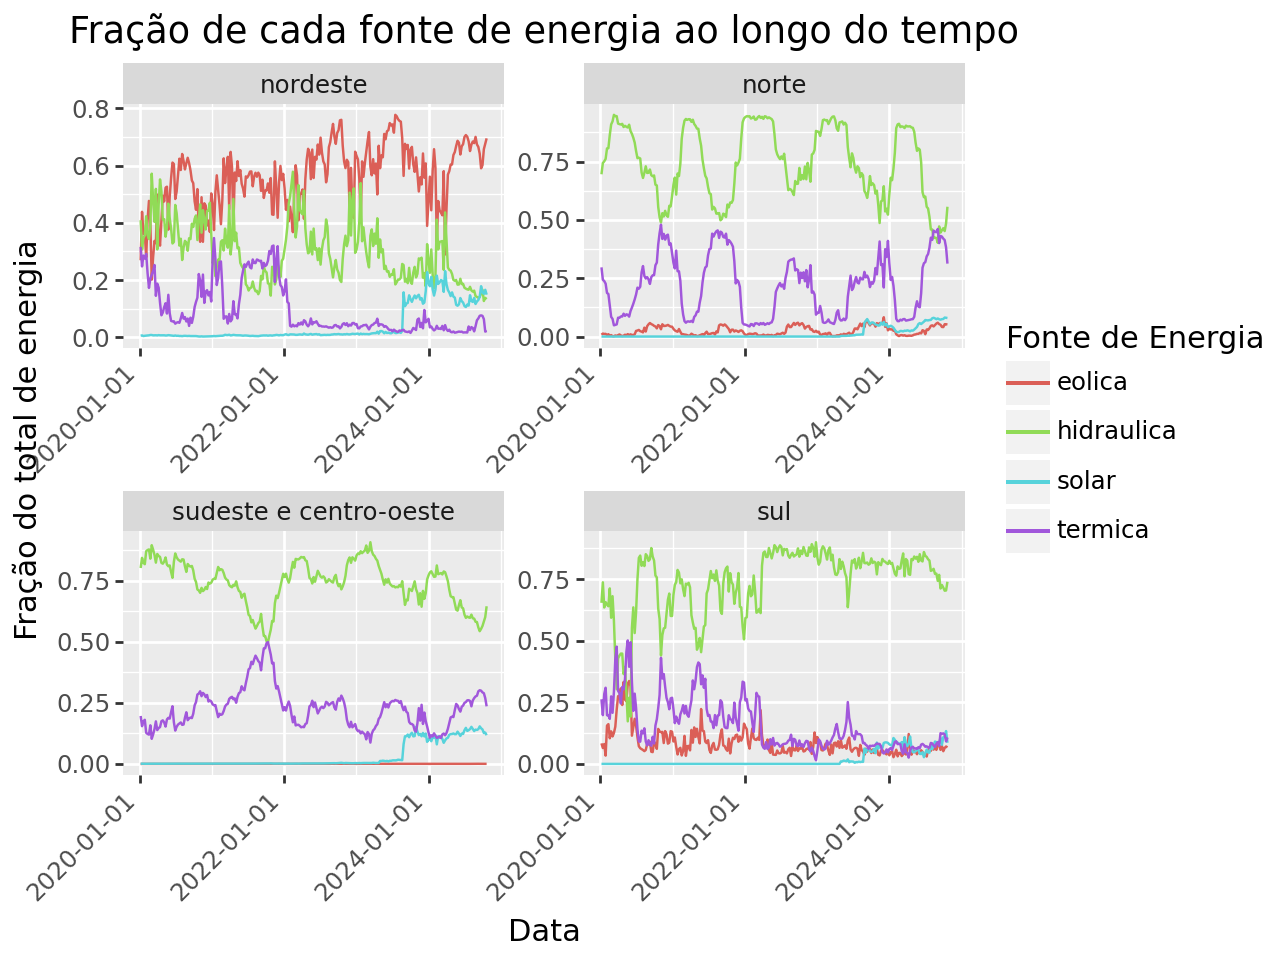

In [46]:
# Todas os gráficos de frações juntos
df_region_total = df_long.groupby(['regiao', 'data'])['valor'].sum().reset_index()

df_fractions = df_long.merge(df_region_total, on=['regiao', 'data'], suffixes=('', '_total'))
df_fractions['fraction'] = df_fractions['valor'] / df_fractions['valor_total']

(
    ggplot(df_fractions, aes(x='data', y='fraction', color='energia'))
    + geom_line()
    + facet_wrap('~regiao', scales='free')
    + labs(title='Fração de cada fonte de energia ao longo do tempo',
           x='Data',
           y='Fração do total de energia',
           color='Fonte de Energia')
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)

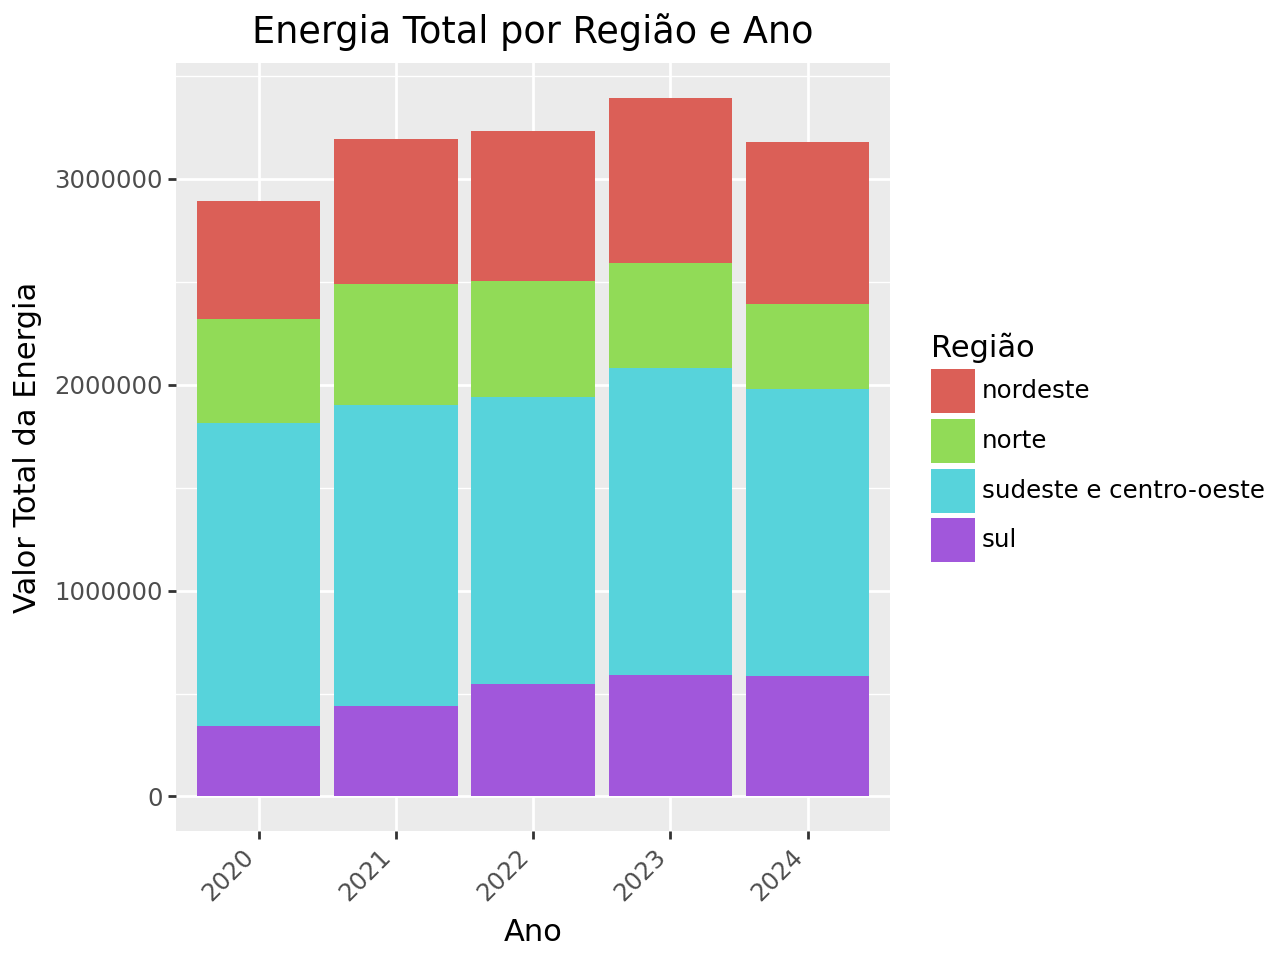

In [47]:
# Esse gráfico é bem legal, mas não da para medir exatamente da forma que eu gostaria
df_region_total = df_long.groupby(['regiao', 'ano'])['valor'].sum().reset_index()

(
    ggplot(df_region_total, aes(x='factor(ano)', y='valor', fill='regiao'))
    + geom_col()
    + labs(title='Energia Total por Região e Ano',
           x='Ano',
           y='Valor Total da Energia',
           fill='Região')
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)

# Total de energia gerada por ano no Brasil (ou seja, juntando as regiões)

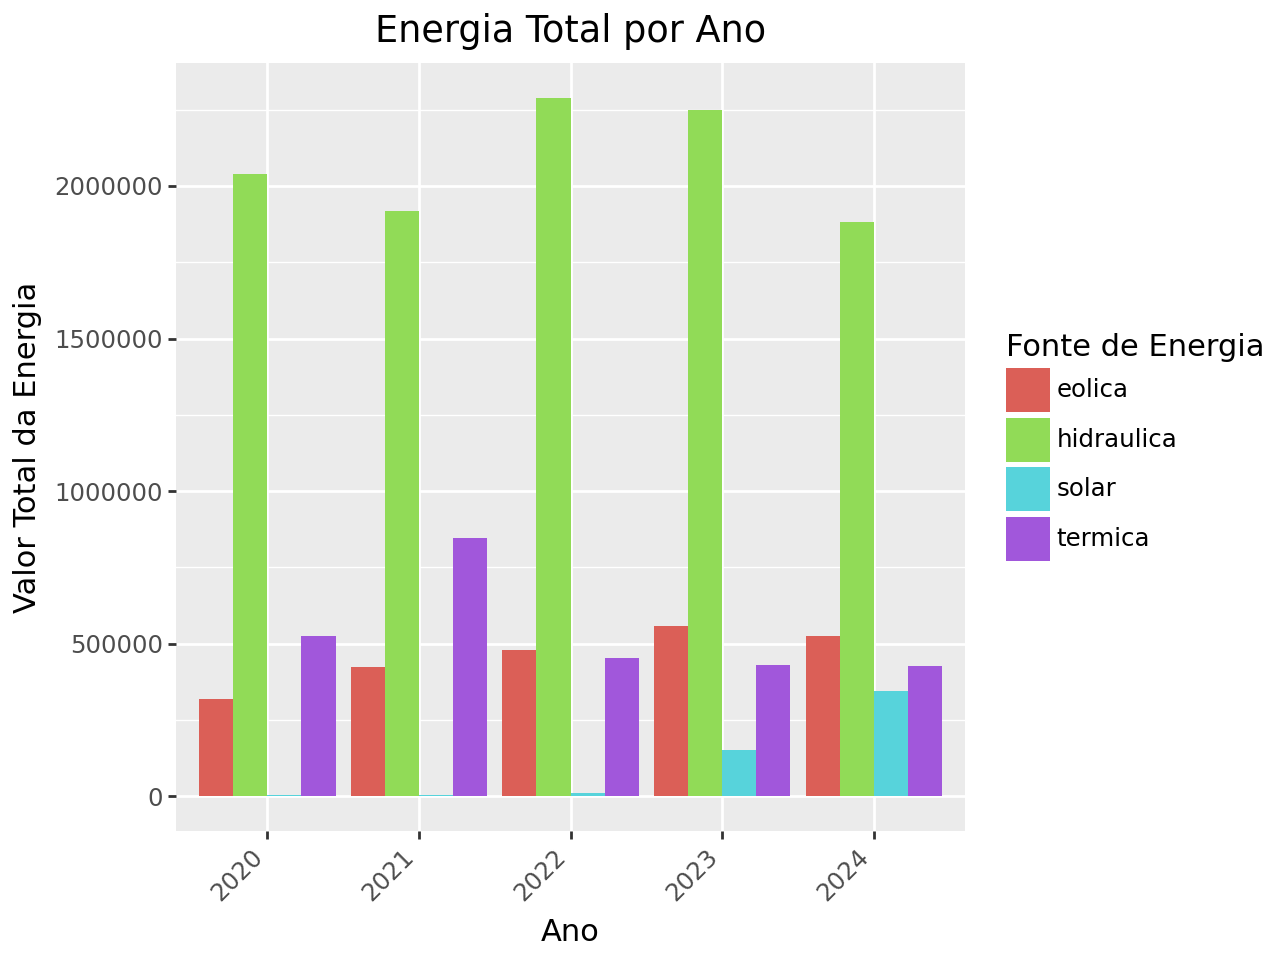

In [39]:
df_grouped = df_long.groupby(['ano', 'energia'])['valor'].sum().reset_index()

(
    ggplot(df_grouped, aes(x='factor(ano)', y='valor', fill='energia'))
    + geom_col(position='dodge')
    + labs(title='Energia Total por Ano',
           x='Ano',
           y='Valor Total da Energia',
           fill='Fonte de Energia')
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)

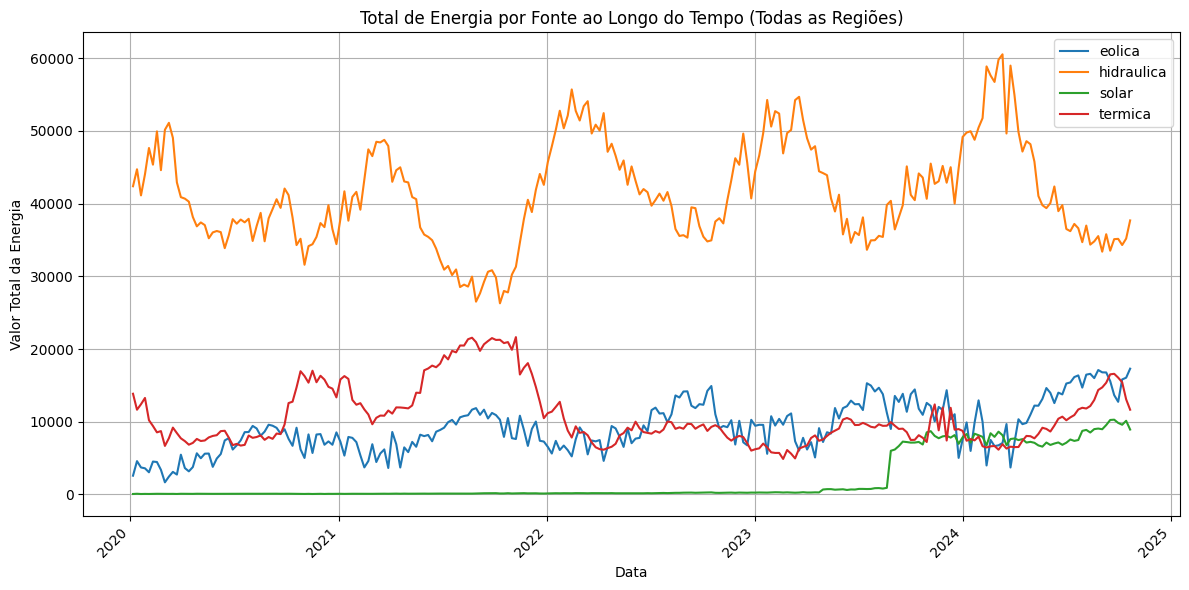

In [ ]:
df_total_energy = df_long.groupby(['data', 'energia'])['valor'].sum().reset_index()

plt.figure(figsize=(12, 6))
for energy_source in df_total_energy['energia'].unique():
    subset = df_total_energy[df_total_energy['energia'] == energy_source]
    plt.plot(subset['data'], subset['valor'], label=energy_source)

plt.xlabel('Data')
plt.ylabel('Valor Total da Energia')
plt.title('Total de Energia por Fonte ao Longo do Tempo (Todas as Regiões)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [43]:
# Analisando qual fonte teve maior crescimento de acordo com o gráfico anterior
pivot_df = df_grouped.pivot(index='energia', columns='ano', values='valor')

growth_rates = pivot_df.pct_change(axis=1)

average_growth_rates = growth_rates.mean(axis=1)
highest_growth_source = average_growth_rates.idxmax()

print(f"A fonte de energia com o maior crescimento médio ao longo do tempo é: {highest_growth_source}")

print("\nValores de cada fonte para cada ano:")
pivot_df

A fonte de energia com o maior crescimento médio ao longo do tempo é: solar

Valores de cada fonte para cada ano:


ano,2020,2021,2022,2023,2024
energia,,,,,
eolica,320286.71,424728.29,480813.86,559737.67,524952.76
hidraulica,2039930.72,1917398.97,2289347.48,2247815.99,1881476.06
solar,4290.78,6186.88,10291.84,150943.13,345766.27
termica,525386.95,846012.82,452217.57,431374.89,427565.30


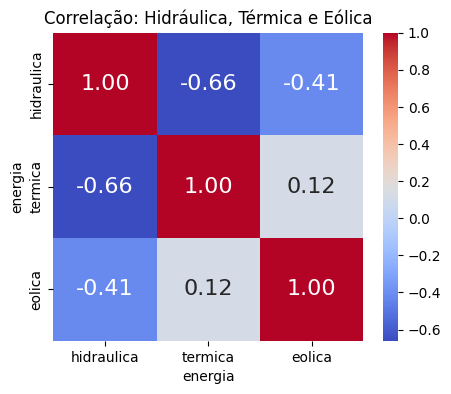

In [ ]:
# Gráfico de correlação de acordo com o gráfico anterior
pivot_df = df_total_energy.pivot(index='data', columns='energia', values='valor')

selected_columns = ['hidraulica', 'termica', 'eolica']
correlation_matrix = pivot_df[selected_columns].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 16}) # Larger numbers
plt.title('Correlação: Hidráulica, Térmica e Eólica')
plt.show()